In [74]:
import mxnet as mx
from mxnet import nd, autograd, gluon
import matplotlib.pyplot as plt

In [75]:
data_ctx = mx.cpu()
model_ctx = mx.cpu()
num_inputs = 7
num_outputs = 1
num_examples = 392
with open("/Users/dinesh/python-test/mpg_scale.data") as f:
    raw_data = f.read()
def process_data(raw_data):
   train_lines = raw_data.splitlines()
   num_examples = len(train_lines)
   num_features = 7
   X = nd.zeros((num_examples, num_features), ctx=data_ctx)
   Y = nd.zeros((num_examples, 1), ctx=data_ctx)
   for i, line in enumerate(train_lines):
       tokens = line.split()
       label = float(tokens[0])
       Y[i] = label
       for token in tokens[1:]:
           tok = token.split(':')
           index = int(tok[0]) - 1
           X[i, index] = tok[1]
   return X, Y
Xtrain, Ytrain = process_data(raw_data)
print(Xtrain.shape)
print(Ytrainn.shape)

(392, 7)
(392, 1)


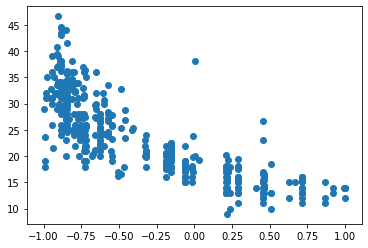

In [76]:
import matplotlib.pyplot as plt
plt.scatter(Xtrain[:, 1].asnumpy(),Ytrain.asnumpy())
plt.show()

In [77]:
batch_size = 20
train_data = gluon.data.DataLoader(gluon.data.ArrayDataset(Xtrain, Ytrain),
                                  batch_size=batch_size, shuffle=True)
net = gluon.nn.Dense(1)
net.collect_params().initialize(mx.init.Normal(sigma=1.), ctx=model_ctx)
square_loss = gluon.loss.L2Loss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.0001})
epochs = 10
loss_sequence = []
num_batches = num_examples / batch_size

for e in range(epochs):
   cumulative_loss = 0
   # inner loop
   for i, (data, label) in enumerate(train_data):
       data = data.as_in_context(model_ctx)
       label = label.as_in_context(model_ctx)
       with autograd.record():
           output = net(data)
           loss = square_loss(output, label)
       loss.backward()
       trainer.step(batch_size)
       cumulative_loss += nd.mean(loss).asscalar()
   print("Epoch %s, loss: %s" % (e, cumulative_loss / num_examples))
   loss_sequence.append(cumulative_loss)

Epoch 0, loss: 14.92550464552276
Epoch 1, loss: 14.891101486828862
Epoch 2, loss: 14.701449180135922
Epoch 3, loss: 14.794140017762476
Epoch 4, loss: 14.537599252194774
Epoch 5, loss: 14.552577894561145
Epoch 6, loss: 14.463236672537667
Epoch 7, loss: 14.260641487277283
Epoch 8, loss: 14.265558982382016
Epoch 9, loss: 14.076062027288943


[5850.797821044922, 5837.311782836914, 5762.968078613281, 5799.302886962891, 5698.738906860352, 5704.610534667969, 5669.588775634766, 5590.171463012695, 5592.09912109375, 5517.816314697266]


Text(0, 0.5, 'average loss')

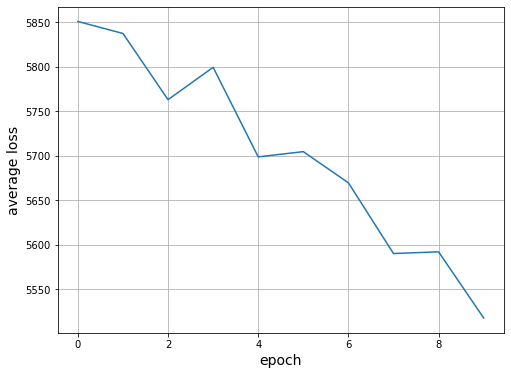

In [78]:
# plot the convergence of the estimated loss function
print(loss_sequence)
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.figure(num=None,figsize=(8, 6))
plt.plot(loss_sequence)

# Adding some bells and whistles to the plot
plt.grid(True, which="both")
plt.xlabel('epoch',fontsize=14)
plt.ylabel('average loss',fontsize=14)

In [79]:
params = net.collect_params() # this returns a ParameterDict
print('The type of "params" is a ',type(params))
# A ParameterDict is a dictionary of Parameter class objects
# therefore, here is how we can read off the parameters from it.
for param in params.values():
   print(param.name,param.data())

The type of "params" is a  <class 'mxnet.gluon.parameter.ParameterDict'>
dense6_weight 
[[-1.0124933  -0.96983016 -1.4211506   1.6486189  -1.5420973  -2.4442804
  -1.4514987 ]]
<NDArray 1x7 @cpu(0)>
dense6_bias 
[0.4326596]
<NDArray 1 @cpu(0)>
